# Analisis de datos de Steam

# 1. Librerias y funciones utiles

## Cargando librerias

In [1]:
# Import any packages here
import gzip
import pandas as pd
import nltk
#import spacy
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
import math
from numpy import nan
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## funciones utiles

In [2]:
# Define any functions here
def readCSV(path):
    f = gzip.open(path, 'rt', encoding="utf8")
    values = []
    for line in f:
        fields = eval(line)
        values.append(fields)
    return values


NaN = float('nan')
false = False
true=  True



# 2. Cargando Dataset


## Cargando datasets

In [3]:
# lectura de datos de python
steam_games = readCSV("/content/drive/MyDrive/steam_games.json.gz")
users_reviews = readCSV("/content/drive/MyDrive/user_reviews.json.gz")
users_items = readCSV("/content/drive/MyDrive/users_items.json.gz")

## Segun el diccionario de datos :

+ [Diccionario de datos](https://docs.google.com/spreadsheets/d/1-t9HLzLHIGXvliq56UE_gMaWBVTPfrlTf2D9uAtLGrk/edit?usp=drive_link)
<br/>

## Games

In [7]:

game_id, price, developer, publisher, genres, app_name, release_date, metascore, specs, early_access, reviews_url, discount_price, tags, url, title = [], [], [], [], [],[], [], [],[], [], [], [], [], [], []

# Procesar los datos del archivo JSON
for game in steam_games:
    game_id.append(game['id'])
    price.append(game['price'])
    developer.append(game['developer'])
    publisher.append(game['publisher'])
    genres.append(game['genres'])
    app_name.append(game['app_name'])
    release_date.append(game['release_date'])
    metascore.append(game['metascore'])
    early_access.append(game['early_access'])
    reviews_url.append(game['reviews_url'])
    discount_price.append(game['discount_price'])
    tags.append(game['tags'])
    title.append(game['title'])

# Crear un DataFrame
games= pd.DataFrame({
    'item_id': game_id,
    'price': price,
    'developer': developer,
    'publisher': publisher,
    'genres': genres,
    'app_name': app_name,
    'release_date': release_date,
    'metascore': metascore,
    'early_access': early_access,
    'reviews_url': reviews_url,
    'discount_price': discount_price,
    'tags': tags,
    'title': title
})



#steam_games

## Reviews

In [8]:
user_id , user_url, item_id, review, posted, recommend, review = [], [], [], [], [], [], []

for user in users_reviews:
    uid = user["user_id"]
    url = user["user_url"]
    for item in user["reviews"]:
      user_id.append(uid)
      user_url.append(url)
      item_id.append(item["item_id"])
      posted.append(item["recommend"])
      recommend.append(item["recommend"])
      review.append(item["review"])



reviews = pd.DataFrame({
  'user_id' : user_id,
  'user_url': user_url,
  'item_id': item_id,
  'posted': posted,
  'recommend': recommend,
  'review': review
})


#steam_reviews

## Items

In [9]:
user_id, user_url, item_id, item_name, playtime_forever, playtime_2weeks = [],[],[],[],[],[]

for items in users_items:
  uid = items["user_id"]
  url= items["user_url"]
  for item in items['items']:
    user_id.append(uid)
    user_url.append(url)
    item_id.append(item["item_id"])
    item_name.append(item["item_name"])
    playtime_forever.append(item["playtime_forever"])
    playtime_2weeks.append(item["playtime_2weeks"])


items = pd.DataFrame({
  'user_id' : user_id,
  'user_url' : user_url,
  'item_id' : item_id,
  'item_name' : item_name,
  'playtime_forever' : playtime_forever,
  'playtime_2weeks' : playtime_2weeks,
})

#steam_items

# 2 EDA: Explorando los datos


## Eplorando

## Ver games

In [10]:
#games.head()
# books
games.tail()

,item_id,price,developer,publisher,genres,app_name,release_date,metascore,early_access,reviews_url,discount_price,tags,title
120440,773640,1.99,"Nikita ""Ghost_RUS""",Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04,NaN,False,http://steamcommunity.com/app/773640/reviews/?...,1.49,"[Strategy, Indie, Casual, Simulation]",Colony On Mars
120441,733530,4.99,Sacada,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018-01-04,NaN,False,http://steamcommunity.com/app/733530/reviews/?...,4.24,"[Strategy, Indie, Casual]",LOGistICAL: South Africa
120442,610660,1.99,Laush Dmitriy Sergeevich,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04,NaN,False,http://steamcommunity.com/app/610660/reviews/?...,1.39,"[Indie, Simulation, Racing]",Russian Roads
120443,658870,4.99,"xropi,stev3ns",SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,2017-09-02,NaN,False,http://steamcommunity.com/app/658870/reviews/?...,NaN,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",EXIT 2 - Directions
120444,681550,4.99,NaN,NaN,NaN,Maze Run VR,NaN,NaN,True,http://steamcommunity.com/app/681550/reviews/?...,NaN,"[Early Access, Adventure, Indie, Action, Simul...",NaN


## Ver reviews

In [11]:
reviews.head()

,user_id,user_url,item_id,posted,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,True,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,22200,True,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,43110,True,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,251610,True,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,227300,True,True,For a simple (it's actually not all that simpl...


## Ver Items

In [ ]:
# ver items
items.head()

,user_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6,0
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0,0
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7,0
3,76561197970982479,http://steamcommunity.com/profiles/76561197970...,40,Deathmatch Classic,0,0
4,76561197970982479,http://steamcommunity.com/profiles/76561197970...,50,Half-Life: Opposing Force,0,0


## EDA: Obtener informacion sobre las columnas

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         32133 non-null  object 
 1   price           30758 non-null  object 
 2   developer       28836 non-null  object 
 3   publisher       24083 non-null  object 
 4   genres          28852 non-null  object 
 5   app_name        32133 non-null  object 
 6   release_date    30068 non-null  object 
 7   metascore       2677 non-null   object 
 8   early_access    32135 non-null  object 
 9   reviews_url     32133 non-null  object 
 10  discount_price  225 non-null    float64
 11  tags            31972 non-null  object 
 12  title           30085 non-null  object 
dtypes: float64(1), object(12)
memory usage: 11.9+ MB


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    59305 non-null  object
 1   user_url   59305 non-null  object
 2   item_id    59305 non-null  object
 3   posted     59305 non-null  bool  
 4   recommend  59305 non-null  bool  
 5   review     59305 non-null  object
dtypes: bool(2), object(4)
memory usage: 1.9+ MB


In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   user_url          object
 2   item_id           object
 3   item_name         object
 4   playtime_forever  int64 
 5   playtime_2weeks   int64 
dtypes: int64(2), object(4)
memory usage: 235.9+ MB


## Resumen estadistico de los datos numericos

In [ ]:
games.describe()

,price,metascore,discount_price
count,30758.000000,30758.000000,160.000000
mean,8.866855,6.074420,4.166187
std,15.903457,20.299893,5.101357
min,0.000000,0.000000,0.490000
25%,2.990000,0.000000,0.727500
50%,4.990000,0.000000,2.140000
75%,9.990000,0.000000,5.277500
max,995.000000,96.000000,31.490000


In [ ]:
reviews.describe()

,user_id,user_url,item_id,posted,recommend,review
count,59305,59305,59305,59305,59305,59305
unique,25458,25458,3682,2,2,55313
top,76561198094665607,http://steamcommunity.com/profiles/76561198094...,730,True,True,good game
freq,20,20,3759,52473,52473,100


In [ ]:
items.describe()

,playtime_forever,playtime_2weeks
count,5.153209e+06,5.153209e+06
mean,9.914951e+02,9.104707e+00
std,5.418204e+03,1.403926e+02
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,3.400000e+01,0.000000e+00
75%,3.550000e+02,0.000000e+00
max,6.427730e+05,1.996700e+04


# Datos faltantes

In [ ]:
games.isnull().sum()

item_id            88312
price              89687
developer          91609
publisher          96362
genres             91593
app_name           88312
release_date       90377
metascore         117768
early_access       88310
reviews_url        88312
discount_price    120220
tags               88473
title              90360
dtype: int64

In [ ]:
reviews.isnull().sum()

user_id      0
user_url     0
item_id      0
posted       0
recommend    0
review       0
dtype: int64

In [ ]:
items.isnull().sum()

user_id             0
user_url            0
item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
dtype: int64

# 2.2 Limpiando data para la visualizacion

In [12]:
games_v = games.copy()

games_v['metascore'].fillna(0, inplace=True)
games_v.dropna(subset=['price'], inplace=True)



In [13]:
# Convierte la columna 'price' a tipo float y los valores no numéricos a 0
games_v['price'] = pd.to_numeric(games_v['price'], errors='coerce').fillna(0)
games_v['metascore'] = pd.to_numeric(games_v['metascore'], errors='coerce').fillna(0)


In [14]:
games_v.dropna(subset=['item_id'], inplace=True)
games_v['genres'].fillna(0, inplace=True)
games_v.head()


,item_id,price,developer,publisher,genres,app_name,release_date,metascore,early_access,reviews_url,discount_price,tags,title
88310,761140,4.99,Kotoshiro,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,0.0,False,http://steamcommunity.com/app/761140/reviews/?...,4.49,"[Strategy, Action, Indie, Casual, Simulation]",Lost Summoner Kitty
88311,643980,0.00,Secret Level SRL,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,0.0,False,http://steamcommunity.com/app/643980/reviews/?...,NaN,"[Free to Play, Strategy, Indie, RPG, Card Game...",Ironbound
88312,670290,0.00,Poolians.com,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,0.0,False,http://steamcommunity.com/app/670290/reviews/?...,NaN,"[Free to Play, Simulation, Sports, Casual, Ind...",Real Pool 3D - Poolians
88313,767400,0.99,彼岸领域,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,0.0,False,http://steamcommunity.com/app/767400/reviews/?...,0.83,"[Action, Adventure, Casual]",弹炸人2222
88314,773570,2.99,NaN,NaN,0,Log Challenge,NaN,0.0,False,http://steamcommunity.com/app/773570/reviews/?...,1.79,"[Action, Indie, Casual, Sports]",NaN


## Visualizacion de datos

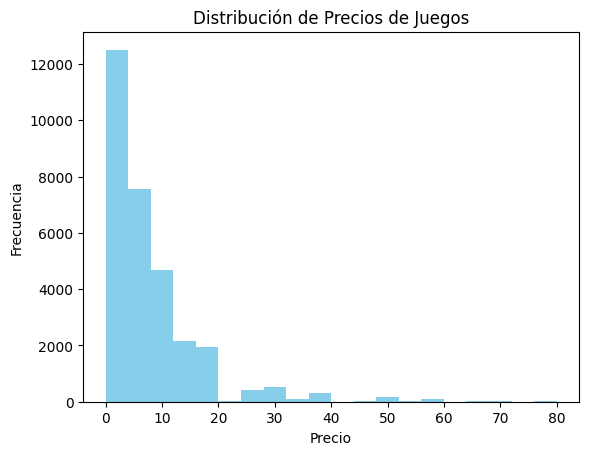

In [16]:
# Ejemplo de histograma de precios en el conjunto de juegos
plt.hist(games_v['price'], bins=20, range=(0,80), color='skyblue')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Juegos')
plt.show()

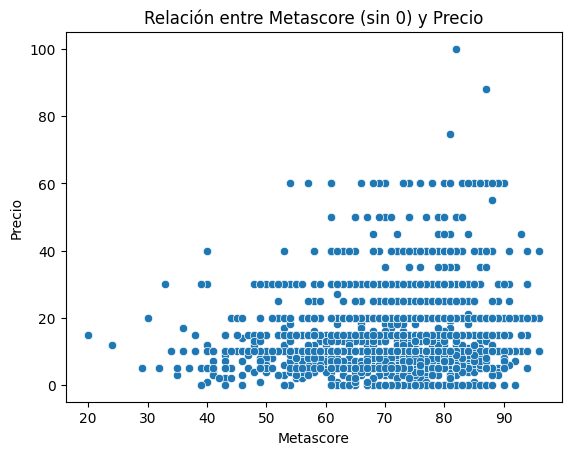

In [17]:
# Filtrar juegos con metascore distinto de 0
games_filtered = games_v[games_v['metascore'] != 0]

# Crear el diagrama de dispersión entre metascore y precio
sns.scatterplot(x='metascore', y='price', data=games_filtered)
plt.xlabel('Metascore')
plt.ylabel('Precio')
plt.title('Relación entre Metascore (sin 0) y Precio')
plt.show()


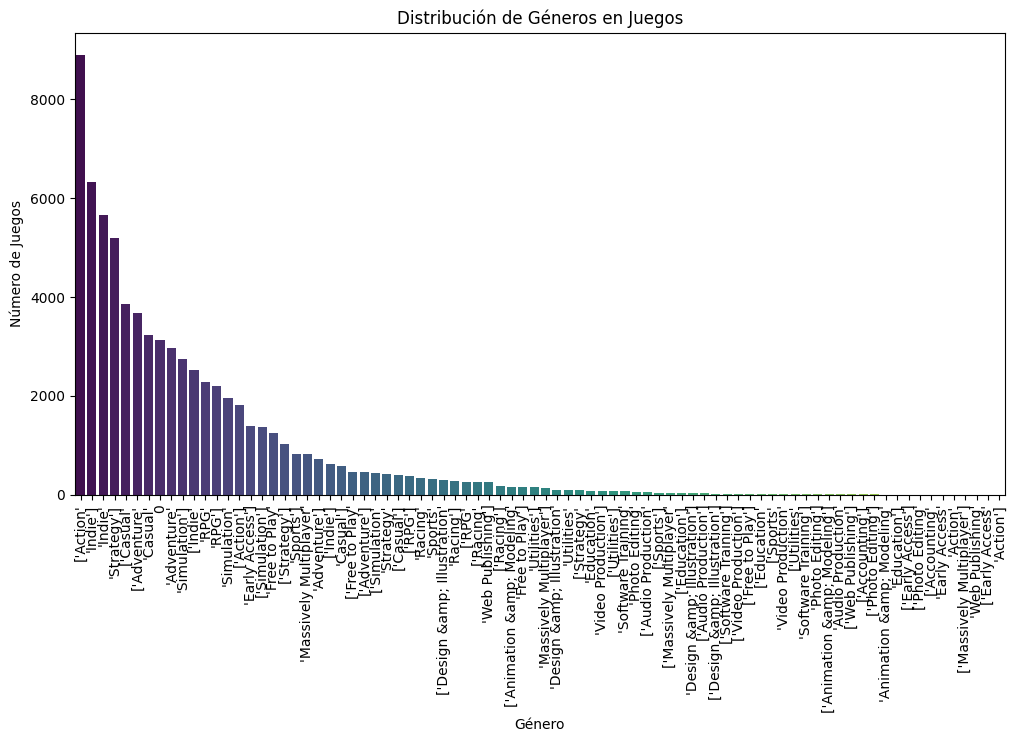

In [18]:
# Elimina filas con valores nulos en la columna 'genres'
games = games_v.dropna(subset=['genres'])

# Convierte la columna 'genres' en strings si no lo es
games_v['genres'] = games_v['genres'].astype(str)

# Luego, realiza la operación para contar los géneros
genre_counts = games_v['genres'].str.split(',').explode().str.strip().value_counts()

# Ahora, puedes crear el gráfico de barras sin errores
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Género')
plt.ylabel('Número de Juegos')
plt.title('Distribución de Géneros en Juegos')
plt.show()

# Sistema de recomendacion

### Convertir reivew  sentiment_analisys

In [19]:
# nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
#resultados = sid.polarity_scores()


def map_to_custom_scale(sentiment_score):
    if sentiment_score < 0:
        return 0  # Malo
    elif sentiment_score == 0:
        return 1  # Neutral
    else:
        return 2  # Positivo}

reviews["sentiment_analysis"] = reviews["review"].apply(lambda i: map_to_custom_scale( sid.polarity_scores(i)['compound']))


reviews.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,user_id,user_url,item_id,posted,recommend,review,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,True,True,Simple yet with great replayability. In my opi...,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,22200,True,True,It's unique and worth a playthrough.,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,43110,True,True,Great atmosphere. The gunplay can be a bit chu...,2
3,js41637,http://steamcommunity.com/id/js41637,251610,True,True,I know what you think when you see this title ...,2
4,js41637,http://steamcommunity.com/id/js41637,227300,True,True,For a simple (it's actually not all that simpl...,2


### Crear tabla de usuarios

In [20]:
# de items -> users
users = items.drop_duplicates(subset='user_id')
users.drop("item_id", axis=1, inplace=True)
users.head()

<ipython-input-20-529287963a1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users.drop("item_id", axis=1, inplace=True)


,user_id,user_url,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,Counter-Strike,6,0
277,js41637,http://steamcommunity.com/id/js41637,Counter-Strike,0,0
1165,evcentric,http://steamcommunity.com/id/evcentric,Red Orchestra: Ostfront 41-45,923,0
1302,Riot-Punch,http://steamcommunity.com/id/Riot-Punch,Counter-Strike,0,0
1630,doctr,http://steamcommunity.com/id/doctr,Day of Defeat: Source,1131,0


### Merge

In [21]:
df1 = users.merge(reviews, on="user_id")

In [ ]:
df1.isnull().sum()

user_id               0
user_url_x            0
item_name             0
playtime_forever      0
playtime_2weeks       0
user_url_y            0
item_id               0
posted                0
recommend             0
review                0
sentiment_analysis    0
dtype: int64

In [22]:
df1.head()

,user_id,user_url_x,item_name,playtime_forever,playtime_2weeks,user_url_y,item_id,posted,recommend,review,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,Counter-Strike,6,0,http://steamcommunity.com/profiles/76561197970...,1250,True,True,Simple yet with great replayability. In my opi...,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,Counter-Strike,6,0,http://steamcommunity.com/profiles/76561197970...,22200,True,True,It's unique and worth a playthrough.,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,Counter-Strike,6,0,http://steamcommunity.com/profiles/76561197970...,43110,True,True,Great atmosphere. The gunplay can be a bit chu...,2
3,js41637,http://steamcommunity.com/id/js41637,Counter-Strike,0,0,http://steamcommunity.com/id/js41637,251610,True,True,I know what you think when you see this title ...,2
4,js41637,http://steamcommunity.com/id/js41637,Counter-Strike,0,0,http://steamcommunity.com/id/js41637,227300,True,True,For a simple (it's actually not all that simpl...,2


In [23]:
# limpiar games
gamess = games.drop(columns=['price', 'developer', 'publisher', 'app_name', 'release_date', 'metascore', 'early_access', 'reviews_url', 'discount_price', 'tags' ])

gamess = gamess.dropna()
gamess.shape


(28824, 3)

In [24]:
gamess.tail()

,item_id,genres,title
120439,745400,"[Action, Adventure, Casual, Indie]",Kebab it Up!
120440,773640,"[Casual, Indie, Simulation, Strategy]",Colony On Mars
120441,733530,"[Casual, Indie, Strategy]",LOGistICAL: South Africa
120442,610660,"[Indie, Racing, Simulation]",Russian Roads
120443,658870,"[Casual, Indie]",EXIT 2 - Directions


In [25]:
data = df1.merge(gamess[['item_id', 'title', 'genres']], on='item_id', how='left')
data.head()


,user_id,user_url_x,item_name,playtime_forever,playtime_2weeks,user_url_y,item_id,posted,recommend,review,sentiment_analysis,title,genres
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,Counter-Strike,6,0,http://steamcommunity.com/profiles/76561197970...,1250,True,True,Simple yet with great replayability. In my opi...,2,Killing Floor,[Action]
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,Counter-Strike,6,0,http://steamcommunity.com/profiles/76561197970...,22200,True,True,It's unique and worth a playthrough.,2,Zeno Clash,"[Action, Indie]"
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,Counter-Strike,6,0,http://steamcommunity.com/profiles/76561197970...,43110,True,True,Great atmosphere. The gunplay can be a bit chu...,2,NaN,NaN
3,js41637,http://steamcommunity.com/id/js41637,Counter-Strike,0,0,http://steamcommunity.com/id/js41637,251610,True,True,I know what you think when you see this title ...,2,NaN,NaN
4,js41637,http://steamcommunity.com/id/js41637,Counter-Strike,0,0,http://steamcommunity.com/id/js41637,227300,True,True,For a simple (it's actually not all that simpl...,2,Euro Truck Simulator 2,"[Indie, Simulation]"


### Creamos users_pivot

In [50]:
# creamos una copia
df=data.copy()

df.drop(columns=['user_url_x', 'item_name', 'playtime_forever', 'playtime_2weeks', 'user_url_y', 'posted', 'recommend', 'review', 'genres' ], axis=1, inplace=True)

df.dropna(inplace=True)
import re  # Import the re module for regular expressions
df["title"] = df["title"].apply(lambda x: re.sub("[\W_]+", " ", x).strip())
df.reset_index(drop=True,inplace=True)
df["item_id"] = df["item_id"].astype(int)

In [51]:
df

,user_id,item_id,sentiment_analysis,title
0,76561197970982479,1250,2,Killing Floor
1,76561197970982479,22200,2,Zeno Clash
2,js41637,227300,2,Euro Truck Simulator 2
3,js41637,239030,2,Papers Please
4,evcentric,248820,2,Risk of Rain
...,...,...,...,...
44669,Ghoustik,730,1,Counter Strike Global Offensive
44670,76561198312638244,233270,2,Far Cry 3 Blood Dragon
44671,76561198312638244,130,2,Half Life Blue Shift
44672,76561198312638244,70,2,Half Life


In [53]:
users_pivot=df.pivot_table(index=["user_id"],columns=["title"],values="sentiment_analysis")
users_pivot.fillna(0,inplace=True)

users_pivot = users_pivot.astype(int)
#users_pivot.columns
print(users_pivot.shape)


(20624, 2871)


In [54]:
users_pivot

title,10 000 000,100 Orange Juice,100 Orange Juice Krila amp Kae Character Pack,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,140,16bit Trader,18 Wheels of Steel Extreme Trucker,1943 Megami Strike,200 Mixed Juice,...,nail d,oO,planetarian the reverie of a little planet,resident evil 4 biohazard 4,sZone Online,the Sequence,the static speaks my name,theHunter Classic,theHunter Primal,Астролорды Облако Оорта
user_id,,,,,,,,,,,,,,,,,,,,,
--000--,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--ace--,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--ionex--,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-2SV-vuLB-Kg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-Azsael-,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zvanik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zwanzigdrei,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zy0705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### basado en contenido

In [55]:
# sistema de recomendacion basado user-user similaridad de coseno de sentiment_analisis

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


# Función para recomendar elementos a un usuario
def recomendacion(user_id, users_pivot):
    usuario_objetivo = users_pivot.loc[user_id]

    similarities = cosine_similarity([usuario_objetivo], users_pivot )

    usuario_similar = similarities[0]

    user_index = users_pivot.index.get_loc(user_id)

    usuario_similar[user_index] = -1  # Excluir al propio usuari
    mejores_usuarios = usuario_similar.argsort()[::-1]

    elementos_vistos = usuario_objetivo[usuario_objetivo > 0].index


    recomendaciones = []
    for usuario_sim in mejores_usuarios:
        elementos_recomendados = users_pivot.iloc[usuario_sim]
        elementos_recomendados = elementos_recomendados[elementos_recomendados > 0].index
        elementos_recomendados = [e for e in elementos_recomendados if e not in elementos_vistos]
        recomendaciones.extend(elementos_recomendados)
        if len(recomendaciones) >= 5:
            break

    return recomendaciones[:5]  # Limitar a 5 recomendaciones

usuario_objetivo = '--ace--'
recomendaciones = recomendacion(usuario_objetivo, users_pivot)

print(f"Recomendaciones para {usuario_objetivo}:")
for i, elemento in enumerate(recomendaciones, 1):
    print(f"{i}. {elemento}")


Recomendaciones para --ace--:
1. Battlefield Bad Company 2
2. Zeno Clash
3. Starbound
4. Borderlands 2
5. The Walking Dead
